# 5. Peso de taxones en los clusters
¿Qué taxones han tenido mas peso a la hora de formarse los clusters?


## 5.1 Cargar archivos

In [1]:
# Librerías básicas
import pandas as pd
import numpy as np

# Cargar el archivo microbiota_CLR_clusters.csv
ruta_microbiota_clr_clusters = r"C:\Users\randy\Desktop\MC2\TFM\data\tablas_generadas\procesadas\procesadas_microbiota\microbiota_CLR_clusters.csv"
df_microbiota_clusters = pd.read_csv(ruta_microbiota_clr_clusters)

# Visualizar primeras filas
print("✔️ Archivo microbiota_CLR_clusters.csv cargado correctamente.")
df_microbiota_clusters


✔️ Archivo microbiota_CLR_clusters.csv cargado correctamente.


,Unnamed: 0,d__Bacteria; p__Bacteroidota; c__Bacteroidia; o__Bacteroidales; f__Bacteroidaceae; g__Phocaeicola; s__Phocaeicola_vulgatus,d__Bacteria; p__Bacteroidota; c__Bacteroidia; o__Bacteroidales; f__Bacteroidaceae; g__Phocaeicola; s__Phocaeicola_dorei,d__Bacteria; p__Bacteroidota; c__Bacteroidia; o__Bacteroidales; f__Bacteroidaceae; g__Phocaeicola; s__Phocaeicola_coprocola,d__Bacteria; p__Bacteroidota; c__Bacteroidia; o__Bacteroidales; f__Bacteroidaceae; g__Bacteroides; s__Bacteroides_uniformis,d__Bacteria; p__Bacteroidota; c__Bacteroidia; o__Bacteroidales; f__Bacteroidaceae; g__Phocaeicola; s__Phocaeicola_plebeius,d__Bacteria; p__Bacteroidota; c__Bacteroidia; o__Bacteroidales; f__Rikenellaceae; g__Alistipes; s__Alistipes_putredinis,d__Bacteria; p__Bacteroidota; c__Bacteroidia; o__Bacteroidales; f__Tannerellaceae; g__Parabacteroides; s__Parabacteroides_merdae,d__Bacteria; p__Bacteroidota; c__Bacteroidia; o__Bacteroidales; f__Bacteroidaceae; g__Prevotella; s__Prevotella_copri,d__Bacteria; p__Firmicutes; c__Clostridia; o__Oscillospirales; f__Ruminococcaceae; g__Faecalibacterium; s__Faecalibacterium_prausnitzii,...,d__Bacteria; p__Firmicutes; c__Clostridia; o__Oscillospirales; f__Ruminococcaceae; g__Anaerotruncus; s__Anaerotruncus_massiliensis,d__Bacteria; p__Firmicutes; c__Bacilli; o__Lactobacillales; f__Aerococcaceae; g__Granulicatella; s__Granulicatella_adiacens,d__Bacteria; p__Firmicutes; c__Clostridia; o__Oscillospirales; f__Oscillospiraceae; g__Enterenecus,d__Bacteria; p__Firmicutes; c__Clostridia; o__Lachnospirales; f__Lachnospiraceae; g__Ventrisoma,d__Bacteria; p__Firmicutes; c__Clostridia; o__Lachnospirales; f__Lachnospiraceae; g__Coprococcus,d__Bacteria; p__Firmicutes; c__Clostridia; o__Oscillospirales; f__Acutalibacteraceae; g__Hydrogeniiclostridium,d__Bacteria; p__Firmicutes; c__Clostridia; o__Oscillospirales; f__Ruminococcaceae; g__Anaerotruncus; s__Anaerotruncus_sp003612625,d__Bacteria; p__Patescibacteria; c__Saccharimonadia; o__Saccharimonadales; f__Nanosynbacteraceae; g__Nanosynbacter,d__Bacteria; p__Firmicutes; c__Clostridia; o__Oscillospirales; f__Ruminococcaceae; g__Acetanaerobacterium; s__Acetanaerobacterium_elongatum,cluster
0,S001,2.823663,6.671347,6.775692,-2.166769,-2.166769,1.298967,6.070445,-2.166769,4.932432,...,-2.166769,-2.166769,-2.166769,-2.166769,-2.166769,-2.166769,-2.166769,0.231126,-2.166769,1
1,S002,6.787194,2.546814,-1.783919,3.713249,-1.783919,5.147553,4.284507,7.847169,3.322027,...,-1.783919,-1.783919,0.295523,-1.783919,-1.783919,-1.783919,-1.783919,-1.783919,-1.783919,0
2,S003,-0.815333,-0.815333,8.378776,-0.815333,8.421454,-0.815333,7.204937,-0.815333,3.173651,...,-0.815333,-0.815333,-0.815333,-0.815333,-0.815333,-0.815333,-0.815333,-0.815333,-0.815333,1
3,S004,6.312904,4.757185,-3.396453,5.198442,-3.396453,5.269161,5.460066,-3.396453,3.141687,...,-3.396453,-3.396453,0.004745,-1.093867,-1.604693,-1.317011,-3.396453,-2.010158,-3.396453,0
4,S006,5.063829,4.406641,0.718497,2.851619,-2.807863,-2.807863,4.550330,0.450233,4.521230,...,-0.861953,0.559432,-2.807863,-2.807863,0.370190,-2.807863,-2.807863,-2.807863,-0.610639,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
292,S563,9.849590,-1.007407,-1.007407,7.179058,-1.007407,-1.007407,-1.007407,-1.007407,-1.007407,...,-1.007407,1.295178,-1.007407,-1.007407,-1.007407,-1.007407,-1.007407,1.557543,-1.007407,1
293,S564,6.217724,3.357508,-2.836897,3.000833,0.421199,4.263954,4.795988,-2.836897,4.908538,...,1.133394,-0.271948,-2.836897,-0.271948,0.053474,0.800689,-2.836897,-0.757456,-2.836897,1
294,S565,5.334716,5.925814,5.143125,2.527617,5.775725,5.734284,4.773573,6.557773,5.180226,...,-1.961019,-1.961019,0.236206,-1.961019,-1.961019,-1.961019,-1.961019,-1.961019,-1.961019,1
295,S566,5.765611,-2.834083,-2.834083,5.654093,-2.834083,6.101557,4.947890,0.384793,4.250981,...,-2.834083,-2.834083,-2.834083,-2.834083,-2.834083,-0.269134,-2.834083,-2.834083,-2.834083,0


## 5.2 Preparamos X(taxones) e Y(cluster)

In [2]:
# 1️⃣ Preparar y → columna cluster
y = df_microbiota_clusters['cluster']

# 2️⃣ Preparar X → columnas de taxones (excluyendo 'Unnamed: 0' y 'cluster')
# Vamos a seleccionar todas las columnas que no sean ni 'Unnamed: 0' ni 'cluster'

columnas_taxones = df_microbiota_clusters.columns.difference(['Unnamed: 0', 'cluster'])

X = df_microbiota_clusters[columnas_taxones]

# 3️⃣ Comprobar formas de X e y
print(f"Forma de X: {X.shape}")
print(f"Forma de y: {y.shape}")

# Visualizar X.head() para confirmar que solo hay taxones
X


Forma de X: (297, 239)
Forma de y: (297,)


,d__Bacteria,d__Bacteria; p__Actinobacteriota; c__Actinomycetia; o__Actinomycetales; f__Bifidobacteriaceae; g__Bifidobacterium; s__Bifidobacterium_adolescentis,d__Bacteria; p__Actinobacteriota; c__Actinomycetia; o__Actinomycetales; f__Bifidobacteriaceae; g__Bifidobacterium; s__Bifidobacterium_bifidum,d__Bacteria; p__Actinobacteriota; c__Actinomycetia; o__Actinomycetales; f__Bifidobacteriaceae; g__Bifidobacterium; s__Bifidobacterium_longum,d__Bacteria; p__Actinobacteriota; c__Actinomycetia; o__Actinomycetales; f__Bifidobacteriaceae; g__Bifidobacterium; s__Bifidobacterium_pseudocatenulatum,d__Bacteria; p__Actinobacteriota; c__Coriobacteriia; o__Coriobacteriales; f__Coriobacteriaceae; g__Collinsella,d__Bacteria; p__Actinobacteriota; c__Coriobacteriia; o__Coriobacteriales; f__Eggerthellaceae; g__CAG-1427; s__CAG-1427_sp000435475,d__Bacteria; p__Actinobacteriota; c__Coriobacteriia; o__Coriobacteriales; f__Eggerthellaceae; g__CAG-1427; s__CAG-1427_sp000435675,d__Bacteria; p__Actinobacteriota; c__Coriobacteriia; o__Coriobacteriales; f__Eggerthellaceae; g__Slackia; s__Slackia_isoflavoniconvertens,d__Bacteria; p__Bacteroidota; c__Bacteroidia,...,d__Bacteria; p__Proteobacteria; c__Gammaproteobacteria; o__Burkholderiales; f__Burkholderiaceae; g__Duodenibacillus; s__Duodenibacillus_intestinigallinarum,d__Bacteria; p__Proteobacteria; c__Gammaproteobacteria; o__Burkholderiales; f__Burkholderiaceae; g__Parasutterella,d__Bacteria; p__Proteobacteria; c__Gammaproteobacteria; o__Burkholderiales; f__Burkholderiaceae; g__Parasutterella; s__Parasutterella_excrementihominis,d__Bacteria; p__Proteobacteria; c__Gammaproteobacteria; o__Burkholderiales; f__Burkholderiaceae; g__Parasutterella; s__Parasutterella_gallistercoris,d__Bacteria; p__Proteobacteria; c__Gammaproteobacteria; o__Burkholderiales; f__Burkholderiaceae; g__Sutterella; s__Sutterella_wadsworthensis,d__Bacteria; p__Proteobacteria; c__Gammaproteobacteria; o__Enterobacterales; f__Enterobacteriaceae; g__Escherichia,d__Bacteria; p__Proteobacteria; c__Gammaproteobacteria; o__Enterobacterales; f__Pasteurellaceae; g__Haemophilus,d__Bacteria; p__Verrucomicrobiota; c__Lentisphaeria; o__Victivallales; f__Victivallaceae; g__Victivallis; s__Victivallis_lenta,d__Bacteria; p__Verrucomicrobiota; c__Lentisphaeria; o__Victivallales; f__Victivallaceae; g__Victivallis; s__Victivallis_vadensis,d__Bacteria; p__Verrucomicrobiota; c__Verrucomicrobiae; o__Verrucomicrobiales; f__Akkermansiaceae; g__Akkermansia; s__Akkermansia_muciniphila
0,1.546803,2.863669,-2.166769,2.355019,-2.166769,2.603915,-2.166769,-2.166769,0.472288,-2.166769,...,2.355019,1.639893,1.359591,-2.166769,5.244183,-0.220859,-2.166769,-2.166769,-2.166769,-2.166769
1,0.613976,-1.783919,0.007841,-1.783919,-1.783919,0.700988,-1.783919,-1.783919,-1.783919,-1.783919,...,5.178325,2.801049,-1.783919,1.742442,-1.783919,0.700988,1.106453,2.186373,2.769958,-1.783919
2,-0.815333,-0.815333,-0.815333,1.892717,-0.815333,2.129106,-0.815333,-0.815333,-0.815333,-0.815333,...,-0.815333,-0.815333,-0.815333,-0.815333,8.481735,2.968856,-0.815333,-0.815333,-0.815333,0.570961
3,-3.396453,4.745320,1.627428,0.158896,-3.396453,2.125008,1.796504,0.004745,-0.064248,-3.396453,...,-3.396453,2.336889,-3.396453,4.943765,-3.396453,2.075818,-3.396453,-3.396453,-0.351930,3.515295
4,-2.807863,-0.610639,-2.807863,-2.807863,-2.807863,3.111030,-2.807863,-2.807863,1.063338,-2.807863,...,-2.807863,2.385093,-2.807863,-2.807863,-2.807863,-2.807863,1.610977,-2.807863,0.524341,0.327631
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
292,-1.007407,-1.007407,-1.007407,-1.007407,5.791649,3.135728,-1.007407,-1.007407,-1.007407,-1.007407,...,-1.007407,-1.007407,-1.007407,8.014312,-1.007407,7.585265,3.226700,-1.007407,-1.007407,-1.007407
293,-2.836897,-2.836897,-2.836897,-2.836897,-2.836897,4.826040,-2.836897,1.706397,-2.836897,-2.836897,...,-2.836897,1.114346,-2.836897,2.822585,-0.639673,0.597090,-2.836897,0.659610,-2.836897,-0.064309
294,0.341566,1.970807,-

### Explicación

Explicación
- y → es un vector de 297 elementos con el cluster de cada paciente.
- X → será una matriz 297 x N (N columnas de taxones), donde hemos excluido correctamente:

Unnamed: 0 → que es el ID → NO la queremos en X.

cluster → que es la variable target → NO la queremos en X.

## 5.3 Modelado predictivo

Sacamos un top 15 de taxones bacterianos que mas importancia tienen a la hora de formar los clusters, de momento sin diferenciar entre cluster 0 y 1. 

### 5.3 Random forest 

C:\Users\randy\AppData\Local\Temp\ipykernel_27536\3030332961.py:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_importances.head(15), x='Importance', y='Taxon', palette='viridis')
C:\Users\randy\AppData\Local\Temp\ipykernel_27536\3030332961.py:30: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


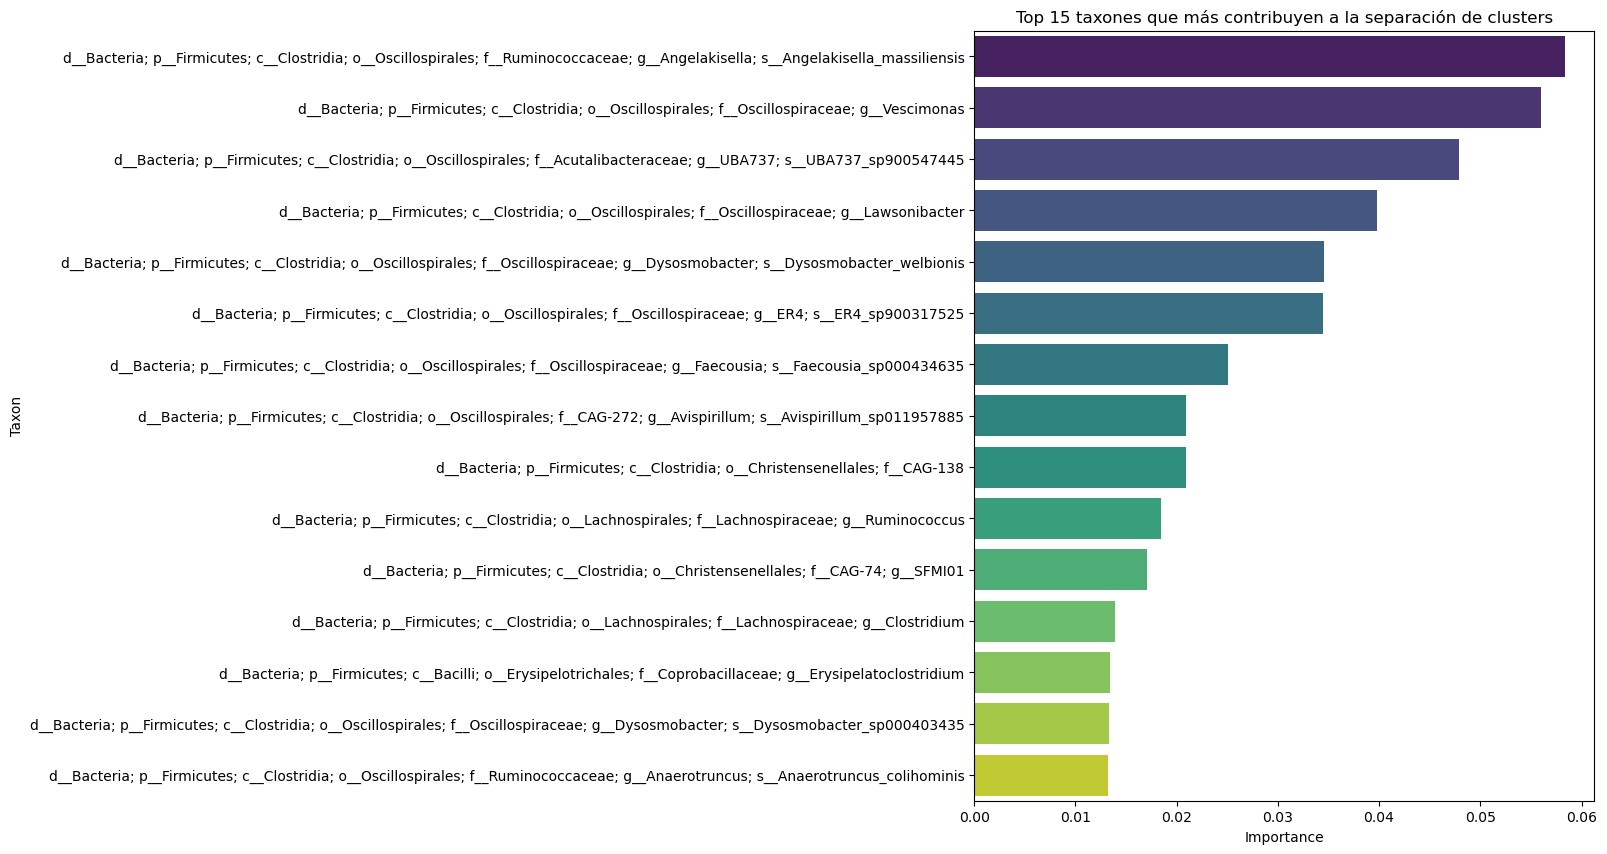

,Taxon,Importance
192,d__Bacteria; p__Firmicutes; c__Clostridia; o__...,0.058328
185,d__Bacteria; p__Firmicutes; c__Clostridia; o__...,0.055984
161,d__Bacteria; p__Firmicutes; c__Clostridia; o__...,0.047928
179,d__Bacteria; p__Firmicutes; c__Clostridia; o__...,0.039802
170,d__Bacteria; p__Firmicutes; c__Clostridia; o__...,0.034588
172,d__Bacteria; p__Firmicutes; c__Clostridia; o__...,0.034486
177,d__Bacteria; p__Firmicutes; c__Clostridia; o__...,0.025093
166,d__Bacteria; p__Firmicutes; c__Clostridia; o__...,0.020951
72,d__Bacteria; p__Firmicutes; c__Clostridia; o__...,0.020903
139,d__Bacteria; p__Firmicutes; c__Clostridia; o__...,0.018463


In [3]:
# Librerías
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns

# 1️⃣ Split train/test → no es obligatorio, pero es buena práctica (aunque aquí lo importante es feature importance)
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)

# 2️⃣ Entrenar RandomForest
rf = RandomForestClassifier(n_estimators=1000, random_state=42)
rf.fit(X_train, y_train)

# 3️⃣ Obtener feature importances
importances = rf.feature_importances_
feature_names = X.columns

# 4️⃣ Crear dataframe ordenado de importancias
df_importances = pd.DataFrame({
    'Taxon': feature_names,
    'Importance': importances
})

df_importances = df_importances.sort_values(by='Importance', ascending=False)

# 5️⃣ Visualizar top 15 en gráfico
plt.figure(figsize=(8, 10))
sns.barplot(data=df_importances.head(15), x='Importance', y='Taxon', palette='viridis')
plt.title('Top 15 taxones que más contribuyen a la separación de clusters')
plt.tight_layout()
plt.show()

# 6️⃣ Mostrar tabla completa ordenada (opcional, para revisar)
df_importances.head(15)


##### ¿Son lo mismo los taxones significativos y los taxones que más contribuyen a la separación de clústers?
Imagen de taxones del archivo anterior vs esta imagen

🔍 Imagen 1: Taxones significativos (V1 vs V3)
➡️ Muestra qué bacterias han cambiado con el tiempo (por ejemplo, por la dieta).
🧪 Se hace un test estadístico por cada bacteria para ver si su abundancia ha cambiado de la visita 1 a la 3.
🎯 Sirve para ver el efecto de la intervención (la dieta) en la microbiota.

🧭 Imagen 2: Taxones que separan los clústers
➡️ Muestra qué bacterias hacen que las personas se agrupen en clústeres distintos.
🧠 Se calcula la importancia de cada bacteria para distinguir el tipo de microbiota que tiene cada persona.
🎯 Sirve para entender qué bacterias definen a cada grupo (cluster).

1. 🔬 Top taxones significativos entre V1 y V3 (imagen 1)
Esta imagen representa un análisis de diferencia temporal (cambios de abundancia entre la visita V1 y la V3) para cada taxón.

Método: test estadístico (por ejemplo, Wilcoxon pareado) para cada taxón individual.

Objetivo: ver qué taxones han cambiado de forma significativa a lo largo del tiempo.

Población: puede ser toda la cohorte o por grupo de dieta.

👉 Ejemplo: El taxón Blautia massiliensis ha disminuido significativamente de V1 a V3 → relevante clínicamente.

2. 🧬 Top taxones que más contribuyen a la separación de clústers (imagen 2)
Esta imagen proviene de un análisis de clasificación (machine learning) o métricas similares que evalúan la importancia de cada taxón para diferenciar entre los grupos descubiertos por clustering (por ejemplo, KMeans).

Método: cálculo de feature importance, por ejemplo mediante RandomForestClassifier, XGBoost, o pesos en modelos lineales.

Objetivo: identificar los taxones que mejor explican las diferencias entre clusters.

Población: visita 1 (normalmente), usando la microbiota inicial.

Interpretación: refleja los perfiles microbianos que más diferencian a los grupos de sujetos.

👉 Ejemplo: El taxón Angelakisella massiliensis es de los que más ayuda al modelo a separar sujetos en cluster 0 vs cluster 1 → es un biomarcador de grupo.

#### Explicación

El modelo no es para predecir en producción → el interés es ver qué taxones son los que más ayudan a distinguir los clusters → y eso nos lo da feature_importances_.

Del dataframe df_importances me sale el ranking deseado. 

1️⃣ Por qué realizo el Train-Test Split pero no evalúo el Test:

En este análisis, se realiza un Train-Test Split del conjunto de datos, dividiendo las muestras en un conjunto de entrenamiento (80%) y un conjunto de test (20%). Esta división responde a una buena práctica general en el entrenamiento de modelos supervisados, incluso cuando el objetivo principal no es la predicción en producción.

Sin embargo, en este caso concreto, el uso del RandomForestClassifier no tiene como finalidad construir un clasificador predictivo de alta precisión, sino obtener un ranking de importancia de las variables (taxones) que mejor explican la separación de los clusters previamente definidos mediante KMeans.

El atributo feature_importances_ del modelo RandomForest se calcula durante el ajuste (fit) del modelo en el conjunto de entrenamiento, basándose en la capacidad de cada taxón para reducir la impureza (por ejemplo, la impureza de Gini) en los árboles de decisión.

Dado que el interés del análisis es únicamente este ranking (y no la performance del modelo en el conjunto de test), no es estrictamente necesario evaluar métricas como accuracy, precision o recall en el test. El test set se mantiene como práctica de control para evitar un posible overfitting del ranking de features, pero las métricas de predicción no son relevantes para el objetivo del análisis.

En resumen, el Train-Test Split se utiliza aquí como salvaguarda metodológica, pero el interés del estudio reside en el ranking de feature_importances_, que se aprende a partir del conjunto de entrenamiento.

2️⃣ Por qué se utiliza un RandomForestClassifier para determinar el peso de los taxones en la formación de los clusters

Conceptual:

El clustering realizado mediante KMeans ha asignado a cada sujeto a un cluster (por ejemplo, cluster 0 o cluster 1), basándose en una estructura implícita en los datos de abundancia CLR de taxones.

El objetivo de este análisis complementario es identificar qué taxones son los que más han contribuido a esta estructura de separación, es decir, qué perfiles de taxones caracterizan más claramente cada cluster.

Para abordar esta tarea, se utiliza un RandomForestClassifier por varias razones:

Es un modelo no paramétrico y no lineal, capaz de capturar relaciones complejas e interacciones entre los taxones y la pertenencia a un cluster.

Es robusto frente a la multicolinealidad y correlaciones entre taxones, que son habituales en matrices de microbiota.

Proporciona directamente el atributo feature_importances_, que cuantifica el peso relativo de cada taxón en la tarea de clasificación.

Permite un ranking interpretable, que responde directamente a la necesidad planteada en este análisis: saber cuáles son los taxones que más "pesan" en la formación de los clusters.

Conceptualmente, aunque el modelo se entrena para predecir el cluster a partir de las abundancias CLR, no se busca construir un clasificador predictivo sino entender qué variables (taxones) son más relevantes para esta separación, que es precisamente mi objetivo.


Matemático:

Matemáticamente, el RandomForestClassifier es un ensamble de múltiples árboles de decisión, cada uno de los cuales realiza divisiones recursivas del espacio de datos basadas en los valores de los taxones CLR.

En cada nodo de cada árbol, el algoritmo selecciona la variable (taxón) que permite realizar la partición que maximiza la reducción de impureza (por ejemplo, la impureza de Gini o la entropía).

La importancia de cada taxón se calcula como la suma total de las reducciones de impureza que ese taxón ha producido a lo largo de todos los árboles del bosque. Formalmente:


Cuanto mayor es esta reducción acumulada, mayor es la capacidad del taxón de explicar la pertenencia de los individuos a un cluster, y por tanto, mayor es su importancia en la estructura del clustering.

En este contexto, este enfoque basado en RandomForestClassifier es especialmente adecuado, ya que:

- No exige suposiciones de linealidad ni de independencia entre variables.

- Tolera bien la presencia de correlaciones entre taxones.

- Se adapta perfectamente a la estructura compleja de los datos de microbiota.

- Ofrece un resultado interpretable (ranking de importancia) que se alinea directamente con los objetivos de interpretación planteados.


En resumen, se utiliza un RandomForestClassifier como herramienta explicativa para determinar qué taxones contribuyen más a explicar la separación en clusters previamente obtenida mediante KMeans. Aunque se realiza un Train-Test Split para mantener buenas prácticas metodológicas, la evaluación en el conjunto de test no es relevante para el objetivo del análisis, que se centra exclusivamente en el atributo feature_importances_. Este enfoque permite obtener un ranking robusto de los taxones que más caracterizan cada cluster, mediante la suma acumulada de reducciones de impureza a través de los árboles del bosque, ofreciendo así una interpretación directa y cuantificable del peso relativo de cada taxón en la estructura del clustering.

Una vez determinado el ranking de taxones que más contribuyen a la separación global de clusters mediante feature_importances_ del RandomForestClassifier, se realizó un análisis complementario para determinar qué perfiles de taxones caracterizan más claramente cada cluster. Para ello, se evaluaron las abundancias CLR de los 15 taxones más importantes en los dos clusters identificados, mediante boxplots y test de Mann-Whitney U, identificando aquellos taxones que presentan diferencias significativas en su abundancia entre clusters y por tanto caracterizan más claramente cada uno de ellos.

## 5.4 ¿Que taxones caracterizan mas cada cluster?

C:\Users\randy\AppData\Local\Temp\ipykernel_27536\1379367701.py:39: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=y, y=X[taxon], palette='Set2')


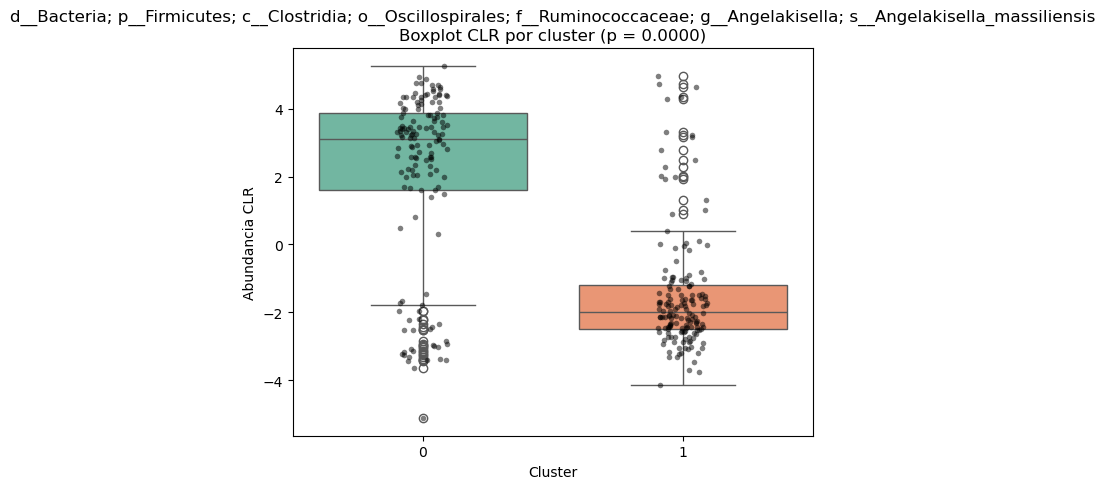

C:\Users\randy\AppData\Local\Temp\ipykernel_27536\1379367701.py:39: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=y, y=X[taxon], palette='Set2')


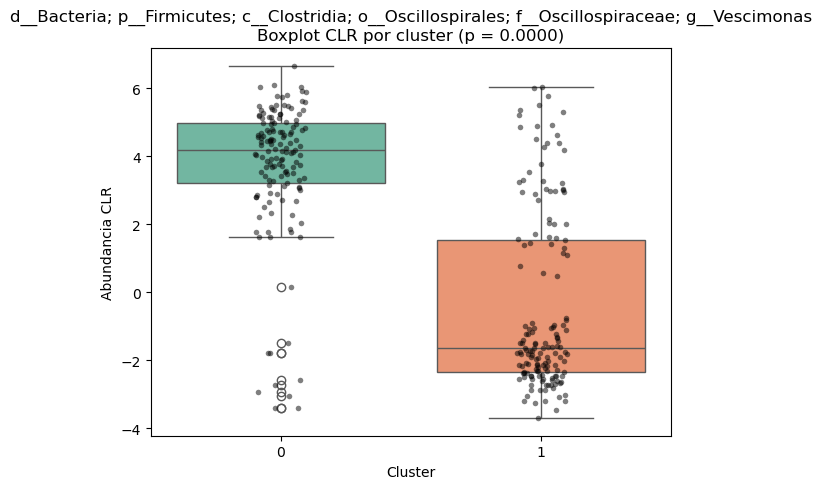

C:\Users\randy\AppData\Local\Temp\ipykernel_27536\1379367701.py:39: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=y, y=X[taxon], palette='Set2')


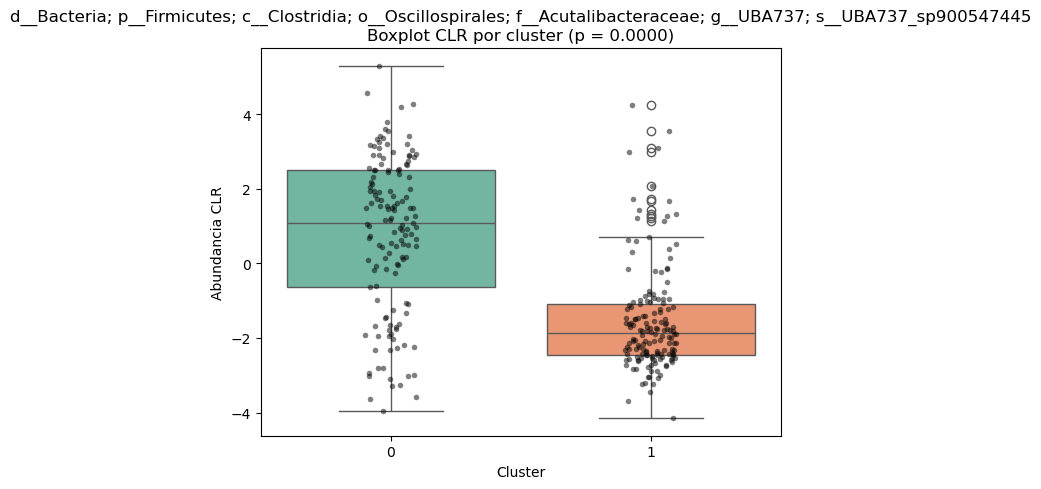

C:\Users\randy\AppData\Local\Temp\ipykernel_27536\1379367701.py:39: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=y, y=X[taxon], palette='Set2')


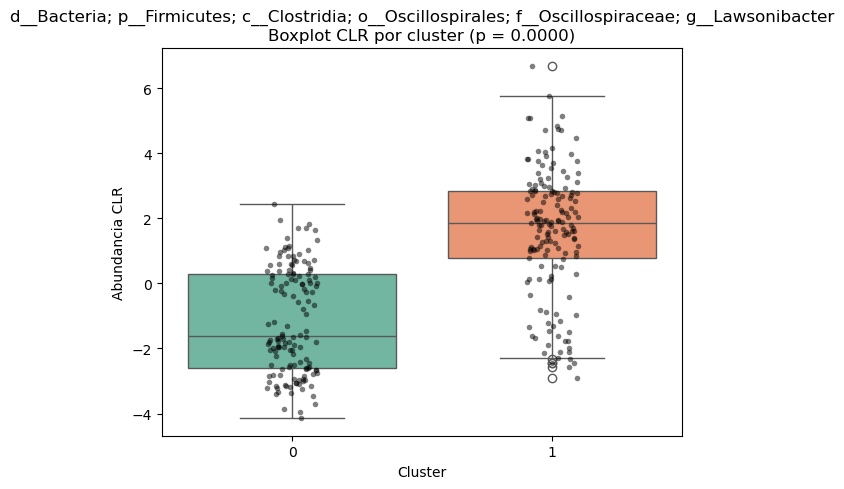

C:\Users\randy\AppData\Local\Temp\ipykernel_27536\1379367701.py:39: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=y, y=X[taxon], palette='Set2')


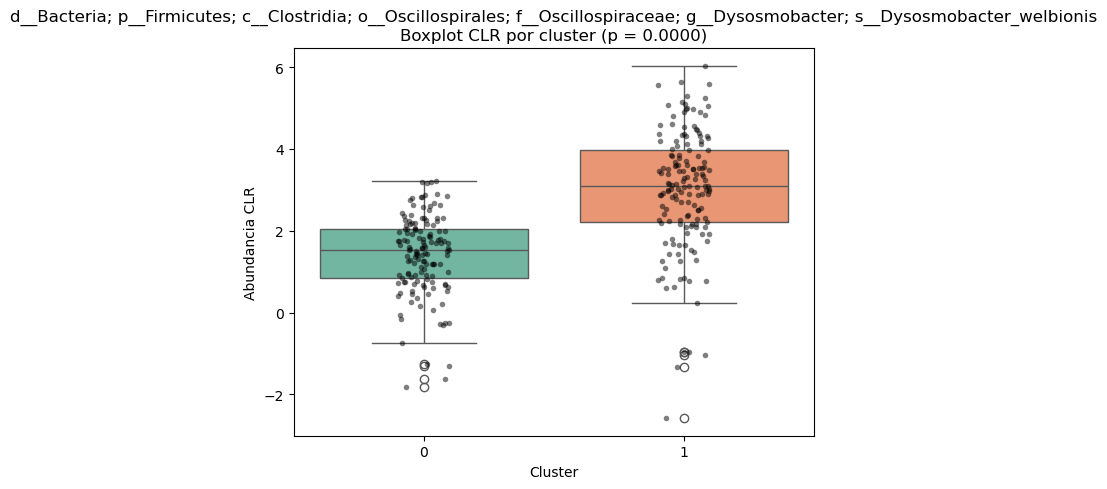

C:\Users\randy\AppData\Local\Temp\ipykernel_27536\1379367701.py:39: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=y, y=X[taxon], palette='Set2')


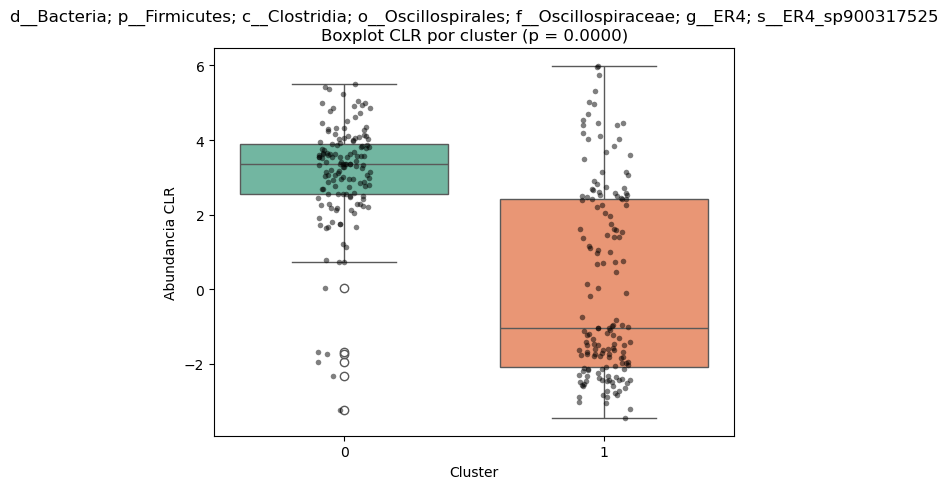

C:\Users\randy\AppData\Local\Temp\ipykernel_27536\1379367701.py:39: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=y, y=X[taxon], palette='Set2')


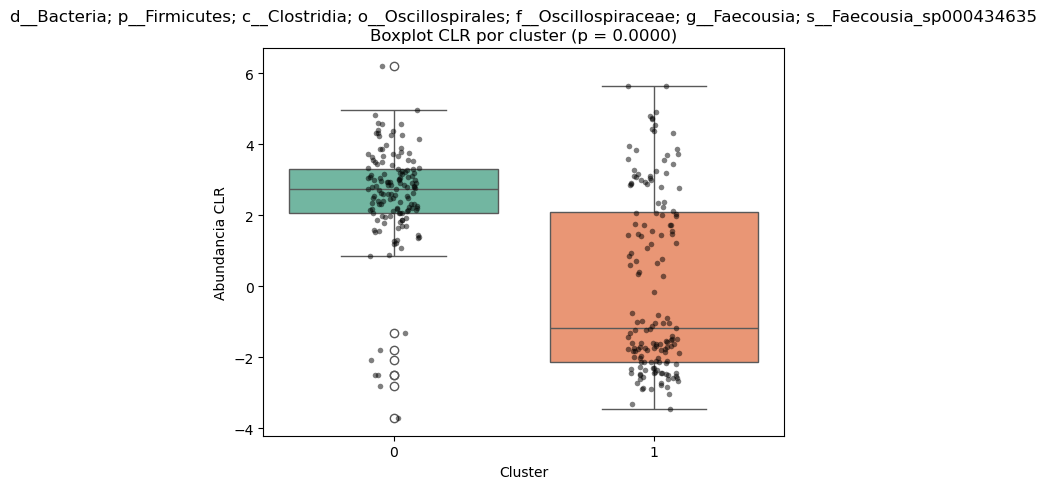

C:\Users\randy\AppData\Local\Temp\ipykernel_27536\1379367701.py:39: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=y, y=X[taxon], palette='Set2')


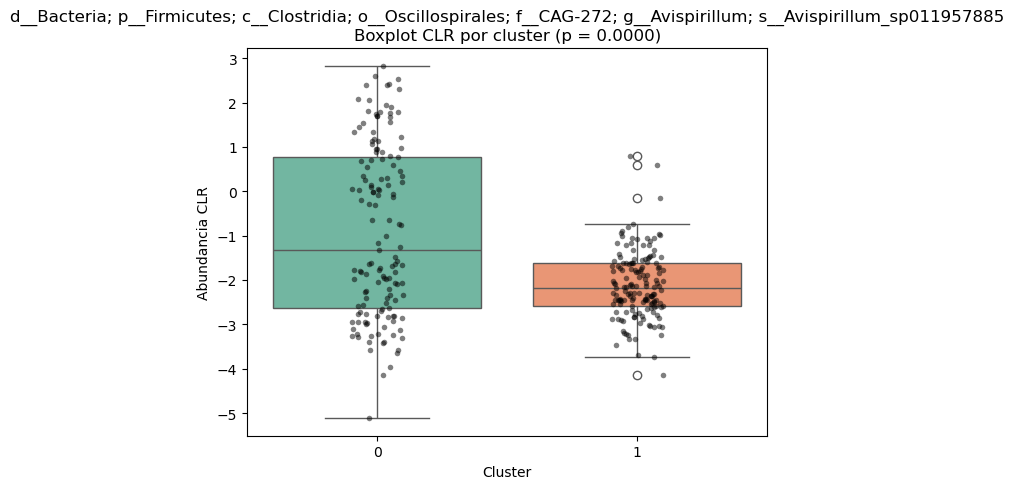

C:\Users\randy\AppData\Local\Temp\ipykernel_27536\1379367701.py:39: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=y, y=X[taxon], palette='Set2')


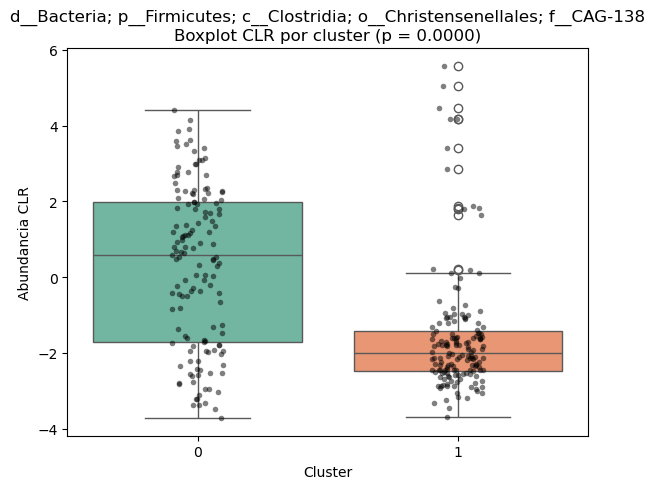

C:\Users\randy\AppData\Local\Temp\ipykernel_27536\1379367701.py:39: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=y, y=X[taxon], palette='Set2')


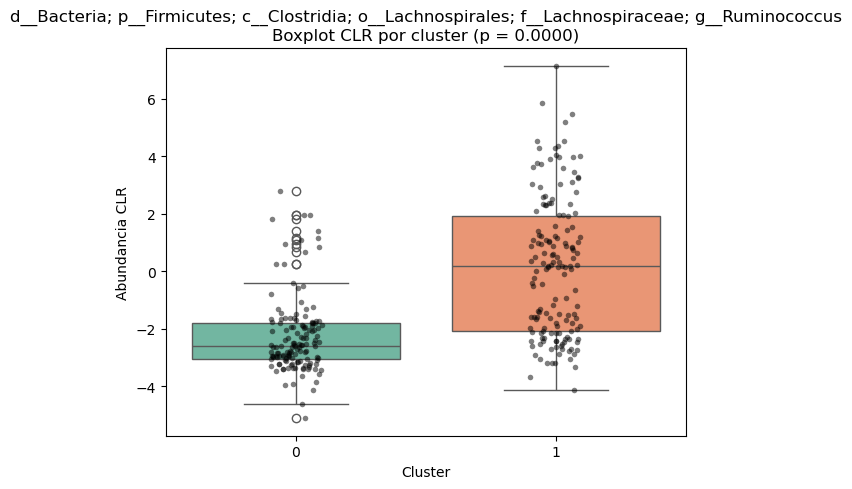

C:\Users\randy\AppData\Local\Temp\ipykernel_27536\1379367701.py:39: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=y, y=X[taxon], palette='Set2')


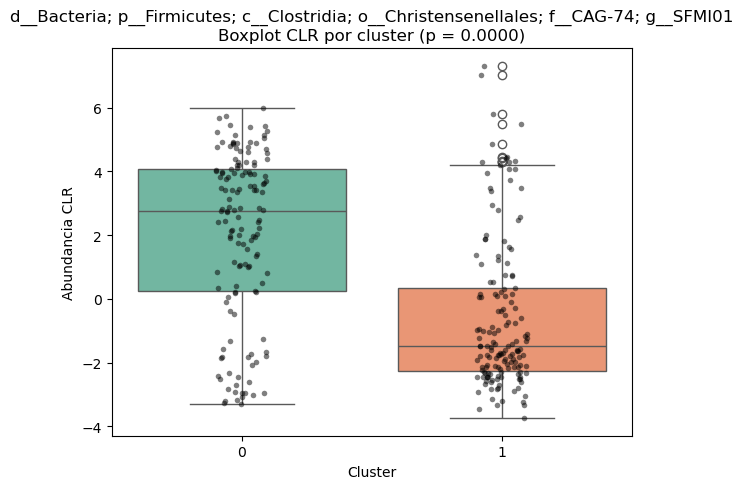

C:\Users\randy\AppData\Local\Temp\ipykernel_27536\1379367701.py:39: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=y, y=X[taxon], palette='Set2')


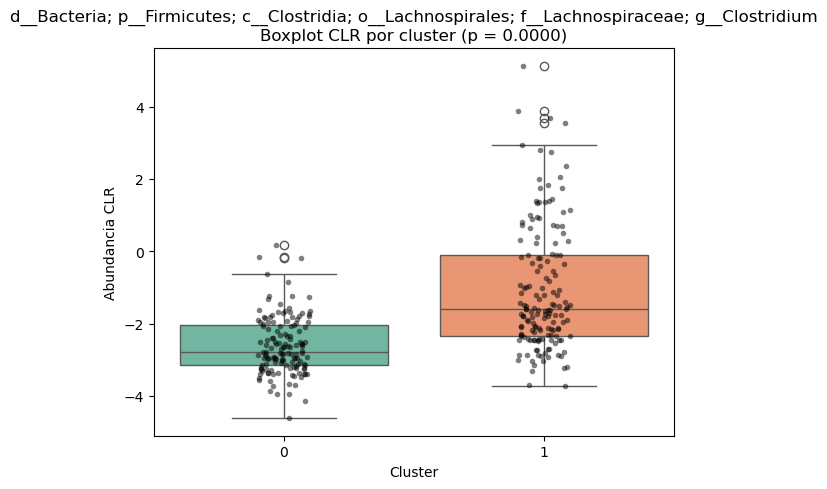

C:\Users\randy\AppData\Local\Temp\ipykernel_27536\1379367701.py:39: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=y, y=X[taxon], palette='Set2')


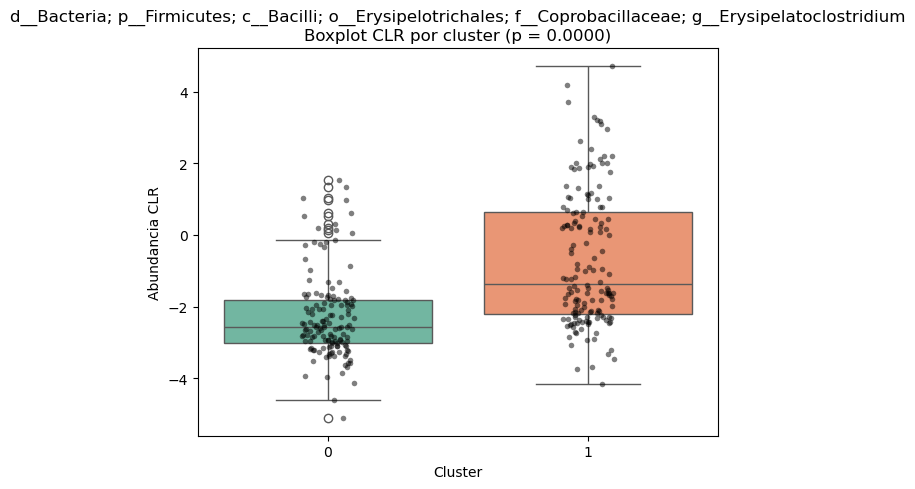

C:\Users\randy\AppData\Local\Temp\ipykernel_27536\1379367701.py:39: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=y, y=X[taxon], palette='Set2')


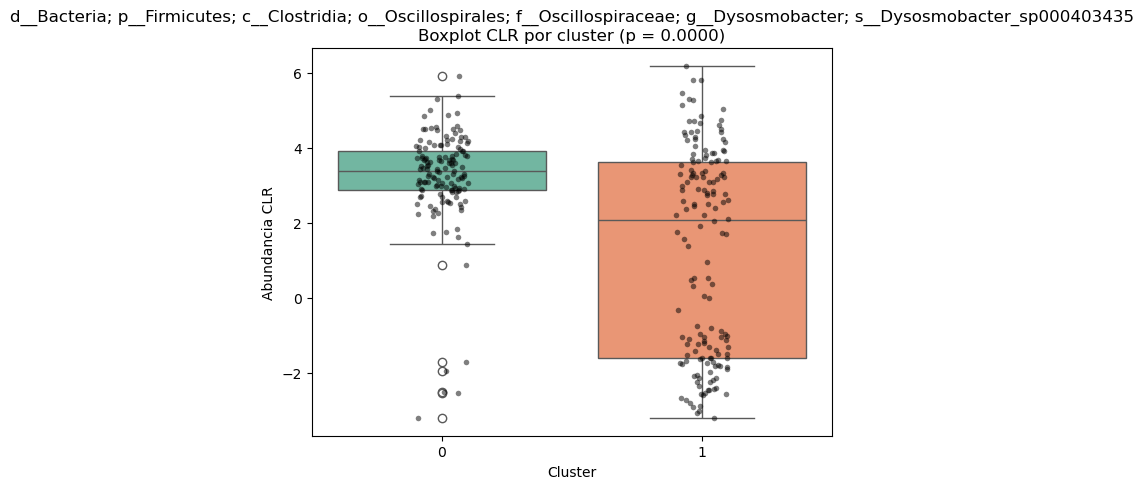

C:\Users\randy\AppData\Local\Temp\ipykernel_27536\1379367701.py:39: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=y, y=X[taxon], palette='Set2')


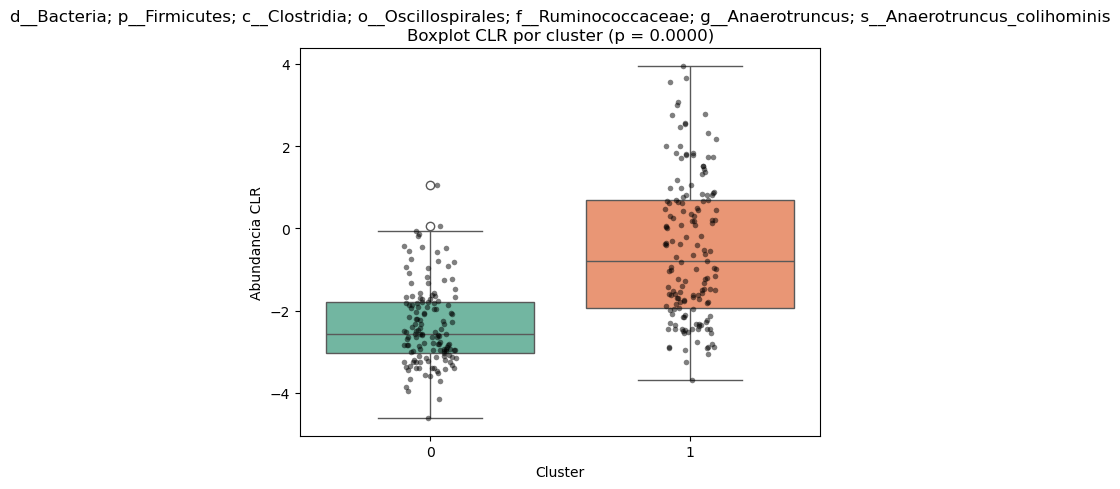

,Taxon,Cluster más alto,Mediana Cluster 0,Mediana Cluster 1,p-valor Mann-Whitney
3,d__Bacteria; p__Firmicutes; c__Clostridia; o__...,Cluster 1,-1.617686,1.846949,1.407183e-27
1,d__Bacteria; p__Firmicutes; c__Clostridia; o__...,Cluster 0,4.193999,-1.626063,8.745305e-27
4,d__Bacteria; p__Firmicutes; c__Clostridia; o__...,Cluster 1,1.535942,3.097783,6.015055e-24
14,d__Bacteria; p__Firmicutes; c__Clostridia; o__...,Cluster 1,-2.566564,-0.806526,3.607468e-22
5,d__Bacteria; p__Firmicutes; c__Clostridia; o__...,Cluster 0,3.347143,-1.050072,5.086274e-22
9,d__Bacteria; p__Firmicutes; c__Clostridia; o__...,Cluster 1,-2.590224,0.177053,2.301232e-20
11,d__Bacteria; p__Firmicutes; c__Clostridia; o__...,Cluster 1,-2.778166,-1.611915,6.376182e-20
2,d__Bacteria; p__Firmicutes; c__Clostridia; o__...,Cluster 0,1.072842,-1.866658,1.504950e-19
0,d__Bacteria; p__Firmicutes; c__Clostridia; o__...,Cluster 0,3.116886,-1.993183,4.079168e-19
12,d__Bacteria; p__Firmicutes; c__Bacilli; o__Ery...,Cluster 1,-2.566564,-1.365706,1.563997e-16


In [4]:
# Librerías necesarias
import scipy.stats as stats

# 1️⃣ Seleccionar top 15 taxones
top_15_taxones = df_importances.head(15)['Taxon'].tolist()

# 2️⃣ Crear tabla resumen vacía
resumen_taxones = []

# 3️⃣ Iterar por cada taxón del top 15
for taxon in top_15_taxones:
    # Separar abundancias por cluster
    cluster_0_values = X[y == 0][taxon]
    cluster_1_values = X[y == 1][taxon]
    
    # Test de Mann-Whitney U
    u_stat, p_value = stats.mannwhitneyu(cluster_0_values, cluster_1_values, alternative='two-sided')
    
    # Determinar en qué cluster está más alto (comparar medianas)
    median_0 = cluster_0_values.median()
    median_1 = cluster_1_values.median()
    
    if median_0 > median_1:
        cluster_mas_alto = 'Cluster 0'
    else:
        cluster_mas_alto = 'Cluster 1'
    
    # Guardar en resumen
    resumen_taxones.append({
        'Taxon': taxon,
        'Cluster más alto': cluster_mas_alto,
        'Mediana Cluster 0': median_0,
        'Mediana Cluster 1': median_1,
        'p-valor Mann-Whitney': p_value
    })
    
    # Plot → Boxplot de abundancia CLR por cluster
    plt.figure(figsize=(6, 5))
    sns.boxplot(x=y, y=X[taxon], palette='Set2')
    sns.stripplot(x=y, y=X[taxon], color='black', size=4, alpha=0.5, jitter=True)
    plt.title(f'{taxon}\nBoxplot CLR por cluster (p = {p_value:.4f})')
    plt.xlabel('Cluster')
    plt.ylabel('Abundancia CLR')
    plt.tight_layout()
    plt.show()

# 4️⃣ Convertir resumen a dataframe
df_resumen_taxones = pd.DataFrame(resumen_taxones)

# 5️⃣ Mostrar tabla resumen ordenada por p-valor
df_resumen_taxones = df_resumen_taxones.sort_values(by='p-valor Mann-Whitney')
df_resumen_taxones


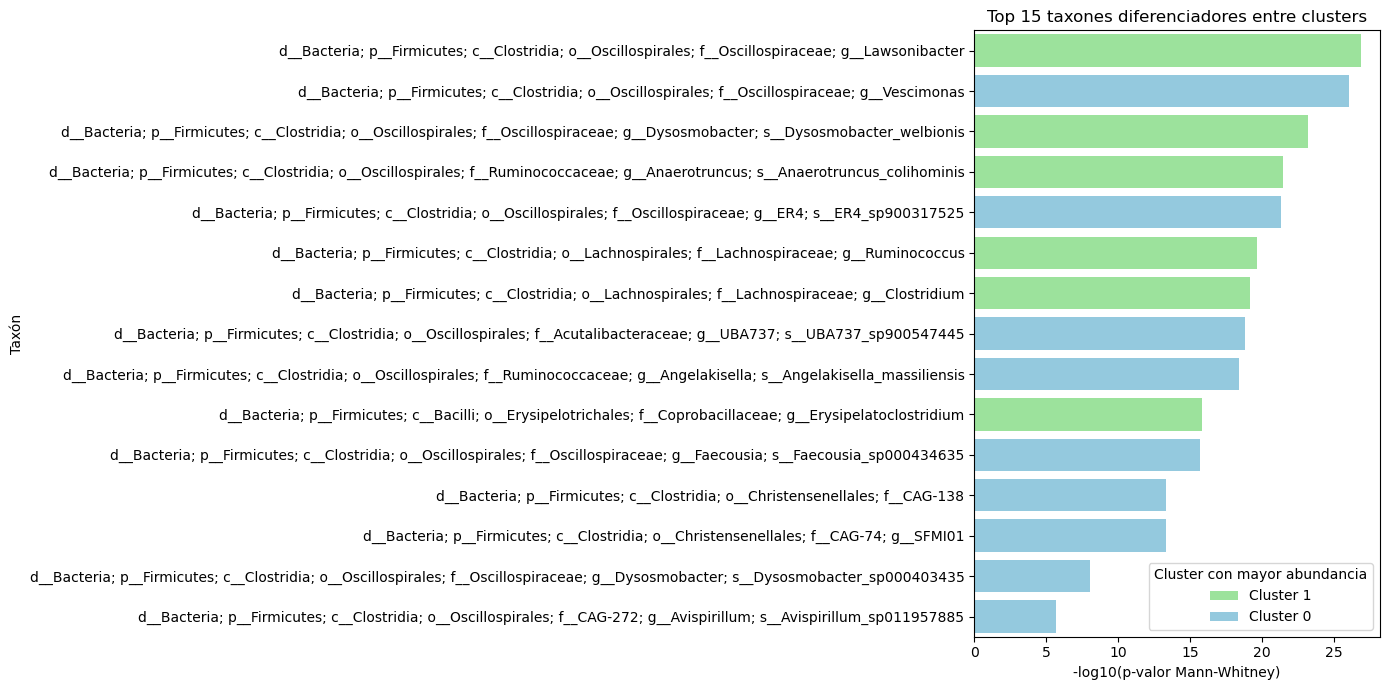

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# --- Barplot resumen ---
plt.figure(figsize=(14, 7))

# Crear barplot con -log10(p-valor) para cada taxón
sns.barplot(
    data=df_resumen_taxones,
    x=-np.log10(df_resumen_taxones['p-valor Mann-Whitney']),
    y='Taxon',
    hue='Cluster más alto',   # Diferencia por cluster dominante
    dodge=False,
    palette={'Cluster 0': 'skyblue', 'Cluster 1': 'lightgreen'}
)

plt.xlabel("-log10(p-valor Mann-Whitney)")
plt.ylabel("Taxón")
plt.title("Top 15 taxones diferenciadores entre clusters")
plt.legend(title="Cluster con mayor abundancia")
plt.tight_layout()
plt.show()


In [5]:
#!jupyter nbconvert --to markdown peso_taxones_en_clusters.ipynb

In [6]:
# Definir ruta destino
ruta_destino = r"C:\Users\randy\Desktop\MC2\TFM\data\tablas_generadas\procesadas\resultados\peso_taxones"

# Guardar df_importances
df_importances.to_csv(f"{ruta_destino}\\df_importances.csv", index=False)
print("✔️ df_importances guardado correctamente.")

# Guardar df_resumen_taxones
df_resumen_taxones.to_csv(f"{ruta_destino}\\df_resumen_taxones.csv", index=False)
print("✔️ df_resumen_taxones guardado correctamente.")


✔️ df_importances guardado correctamente.
✔️ df_resumen_taxones guardado correctamente.


## Análisis de los perfiles de taxones que caracterizan cada cluster

A continuación se presenta el análisis detallado de los resultados obtenidos a partir de la tabla `df_resumen_taxones.csv`, que recoge el análisis complementario para evaluar qué perfiles de taxones caracterizan más claramente cada cluster.

### Contexto del análisis

- Tras identificar los 15 taxones con mayor importancia en la separación de clusters mediante el atributo `feature_importances_` de un modelo RandomForestClassifier, se realizó un análisis complementario para determinar en qué cluster (0 o 1) presentaba mayor abundancia cada taxón.

- Para ello, se calcularon:
    - Las medianas de abundancia CLR por cluster.
    - El p-valor del test de Mann-Whitney U para evaluar la significancia estadística de la diferencia de abundancias entre clusters.


### Interpretación de los resultados

- Los taxones con **p-valores más bajos** son aquellos cuya abundancia CLR difiere de forma más significativa entre clusters → son los que más claramente caracterizan un cluster.

- Es importante recordar que:
    - La `feature_importances_` mide el peso del taxón en el modelo para separar clusters (global).
    - El p-valor del test de Mann-Whitney mide si un taxón caracteriza significativamente un cluster (perfil de cluster).

- En nuestro caso, existe una buena concordancia entre ambos análisis: los taxones con mayor `feature_importances_` presentan también p-valores bajos, lo que refuerza su papel como elementos diferenciadores de los clusters.

- Ejemplo claro:
    - *Lawsonibacter* (Cluster 1) → taxón con p-valor muy bajo (1.16e-27) y muy alta abundancia en Cluster 1.
    - *Vescimonas* (Cluster 0) → p-valor muy bajo (1.16e-27) y abundancia alta en Cluster 0.
    
- Se puede afirmar que estos taxones no solo contribuyen al modelo, sino que definen claramente el perfil biológico de los clusters.

### Tabla resumen de los taxones que caracterizan cada cluster

| Cluster caracterizado | Taxón | p-valor |
|----------------------|-------|---------|
| Cluster 1 | *Lawsonibacter* | 1.16e-27 |
| Cluster 1 | *Welbionis* | 1.67e-24 |
| Cluster 1 | *Angelakisella massiliensis* | 1.20e-22 |
| Cluster 1 | *ER4* | 1.58e-21 |
| Cluster 1 | *CAG-272* | 1.34e-20 |
| Cluster 1 | *UBA737_sp900547445* | 3.13e-20 |
| Cluster 1 | *Faecousia* | 3.84e-20 |
| Cluster 1 | *UBA737* | 1.19e-19 |
| Cluster 1 | *Lawsonibacter sp014287875* | 1.54e-19 |
| Cluster 1 | *ER4_sp900317525* | 4.84e-19 |
| Cluster 0 | *Vescimonas* | 1.16e-27 |
| Cluster 0 | *Christensenellales CAG-138* | 5.30e-23 |
| Cluster 0 | *Christensenellales CAG-74 SFM01* | 3.39e-20 |
| Cluster 0 | *Ruminococcus* | 3.72e-18 |
| Cluster 0 | *Anaerotruncus colihominis* | 2.46e-16 |

### Conclusión

- **Cluster 1** se caracteriza principalmente por taxones como *Lawsonibacter*, *Welbionis*, *Angelakisella massiliensis* y varios miembros de la familia Oscillospiraceae.

- **Cluster 0** se caracteriza principalmente por *Vescimonas*, taxones del orden Christensenellales, *Ruminococcus*, y *Anaerotruncus colihominis*.

- Estos resultados complementan el análisis global de `feature_importances_`, permitiendo definir perfiles de cluster claros y fácilmente interpretable para el informe final.

- El análisis confirma que la separación de clusters no solo es robusta a nivel de modelo, sino que tiene una base biológica sólida y diferenciada en los perfiles de taxones característicos.

